___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___
# Matplotlib Overview Lecture

## Introduction

Matplotlib is the "grandfather" library of data visualization with Python. It was created by John Hunter. He created it to try to replicate MatLab's (another programming language) plotting capabilities in Python. So if you happen to be familiar with matlab, matplotlib will feel natural to you.

It is an excellent 2D and 3D graphics library for generating scientific figures. 

Some of the major Pros of Matplotlib are:

* Generally easy to get started for simple plots
* Support for custom labels and texts
* Great control of every element in a figure
* High-quality output in many formats
* Very customizable in general

Matplotlib allows you to create reproducible figures programmatically. Let's learn how to use it! Before continuing this lecture, I encourage you just to explore the official Matplotlib web page: http://matplotlib.org/

## Installation 

You'll need to install matplotlib first with either:

    conda install matplotlib
or
    pip install matplotlib
    
## Importing

Import the `matplotlib.pyplot` module under the name `plt` (the tidy way):

In [1]:
import matplotlib.pyplot as plt

You'll also need to use this line to see plots in the notebook:

In [3]:
%matplotlib inline

That line is only for jupyter notebooks, if you are using another editor, you'll use: **plt.show()** at the end of all your plotting commands to have the figure pop up in another window.

# Basic Example

Let's walk through a very simple example using two numpy arrays:

### Example

Let's walk through a very simple example using two numpy arrays. You can also use lists, but most likely you'll be passing numpy arrays or pandas columns (which essentially also behave like arrays).

** The data we want to plot:**

In [7]:
import numpy as np
x = np.linspace(0, 5, 11)
y = x ** 4

In [8]:
x

array([ 0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ])

In [9]:
y

array([  0.00000000e+00,   6.25000000e-02,   1.00000000e+00,
         5.06250000e+00,   1.60000000e+01,   3.90625000e+01,
         8.10000000e+01,   1.50062500e+02,   2.56000000e+02,
         4.10062500e+02,   6.25000000e+02])

## Basic Matplotlib Commands

We can create a very simple line plot using the following ( I encourage you to pause and use Shift+Tab along the way to check out the document strings for the functions we are using).

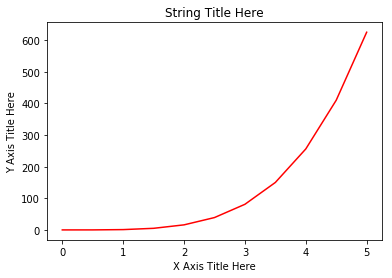

In [10]:
plt.plot(x, y, 'r') # 'r' is the color red
plt.xlabel('X Axis Title Here')
plt.ylabel('Y Axis Title Here')
plt.title('String Title Here')
plt.show()

## Creating Multiplots on Same Canvas

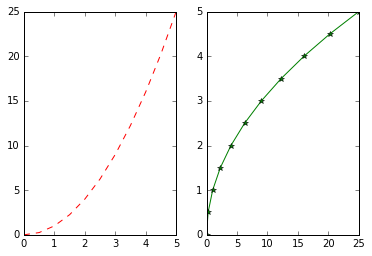

In [14]:
# plt.subplot(nrows, ncols, plot_number)
plt.subplot(1,2,1)
plt.plot(x, y, 'r--') # More on color options later
plt.subplot(1,2,2)
plt.plot(y, x, 'g*-');

___
# Matplotlib Object Oriented Method
Now that we've seen the basics, let's break it all down with a more formal introduction of Matplotlib's Object Oriented API. This means we will instantiate figure objects and then call methods or attributes from that object.

## Introduction to the Object Oriented Method

The main idea in using the more formal Object Oriented method is to create figure objects and then just call methods or attributes off of that object. This approach is nicer when dealing with a canvas that has multiple plots on it. 

To begin we create a figure instance. Then we can add axes to that figure:

Text(0.5,1,'Set Title')

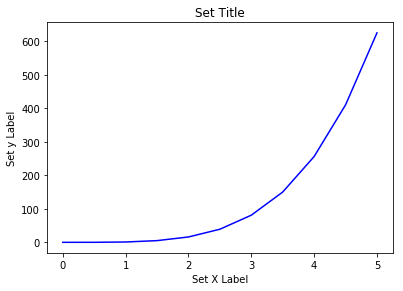

In [11]:
# Create Figure (empty canvas)
fig = plt.figure()

# Add set of axes to figure
axes = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # left, bottom, width, height (range 0 to 1)

# Plot on that set of axes
axes.plot(x, y, 'b') 
axes.set_xlabel('Set X Label') # Notice the use of set_ to begin methods
axes.set_ylabel('Set y Label')
axes.set_title('Set Title')

Code is a little more complicated, but the advantage is that we now have full control of where the plot axes are placed, and we can easily add more than one axis to the figure:

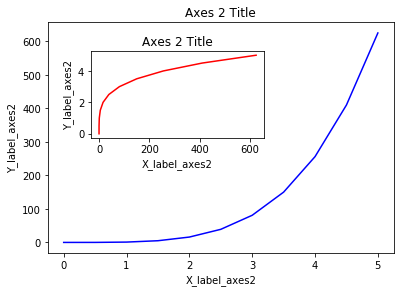

In [12]:
# Creates blank canvas
fig = plt.figure()

axes1 = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # main axes
axes2 = fig.add_axes([0.2, 0.5, 0.4, 0.3]) # inset axes

# Larger Figure Axes 1
axes1.plot(x, y, 'b')
axes1.set_xlabel('X_label_axes2')
axes1.set_ylabel('Y_label_axes2')
axes1.set_title('Axes 2 Title')

# Insert Figure Axes 2
axes2.plot(y, x, 'r')
axes2.set_xlabel('X_label_axes2')
axes2.set_ylabel('Y_label_axes2')
axes2.set_title('Axes 2 Title');

## subplots()

The plt.subplots() object will act as a more automatic axis manager.

Basic use cases:

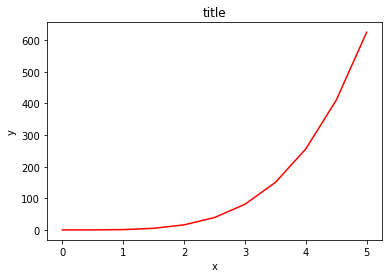

In [13]:
# Use similar to plt.figure() except use tuple unpacking to grab fig and axes
fig, axes = plt.subplots()

# Now use the axes object to add stuff to plot
axes.plot(x, y, 'r')
axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title('title');

Then you can specify the number of rows and columns when creating the subplots() object:

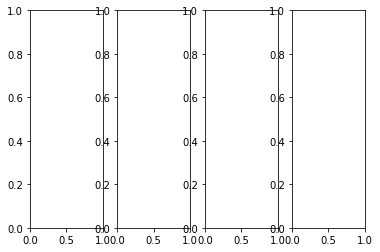

In [15]:
# Empty canvas of 1 by 2 subplots
fig, axes = plt.subplots(nrows=1, ncols=4)

In [25]:
# Axes is an array of axes to plot on
axes

array([<matplotlib.axes._subplots.AxesSubplot object at 0x111f0f8d0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x1121f5588>], dtype=object)

We can iterate through this array:

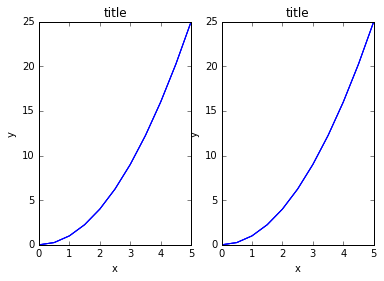

In [28]:
for ax in axes:
    ax.plot(x, y, 'b')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title('title')

# Display the figure object    
fig

A common issue with matplolib is overlapping subplots or figures. We ca use **fig.tight_layout()** or **plt.tight_layout()** method, which automatically adjusts the positions of the axes on the figure canvas so that there is no overlapping content:

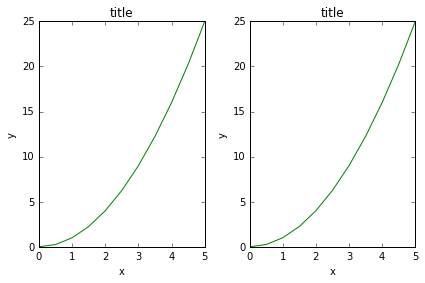

In [32]:
fig, axes = plt.subplots(nrows=1, ncols=2)

for ax in axes:
    ax.plot(x, y, 'g')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title('title')

fig    
plt.tight_layout()

### Figure size, aspect ratio and DPI

Matplotlib allows the aspect ratio, DPI and figure size to be specified when the Figure object is created. You can use the `figsize` and `dpi` keyword arguments. 
* `figsize` is a tuple of the width and height of the figure in inches
* `dpi` is the dots-per-inch (pixel per inch). 

For example:

In [33]:
fig = plt.figure(figsize=(8,4), dpi=100)

The same arguments can also be passed to layout managers, such as the `subplots` function:

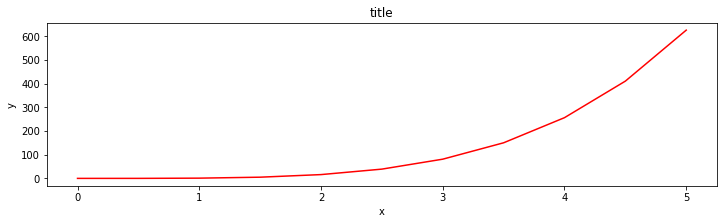

In [16]:
fig, axes = plt.subplots(figsize=(12,3))

axes.plot(x, y, 'r')
axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title('title');

## Saving figures
Matplotlib can generate high-quality output in a number formats, including PNG, JPG, EPS, SVG, PGF and PDF. 

To save a figure to a file we can use the `savefig` method in the `Figure` class:

In [17]:
fig.savefig("filename.png")

Here we can also optionally specify the DPI and choose between different output formats:

In [18]:
fig.savefig("filename.png", dpi=200)

____
## Legends, labels and titles

Now that we have covered the basics of how to create a figure canvas and add axes instances to the canvas, let's look at how decorate a figure with titles, axis labels, and legends.

**Figure titles**

A title can be added to each axis instance in a figure. To set the title, use the `set_title` method in the axes instance:

In [41]:
ax.set_title("title");

**Axis labels**

Similarly, with the methods `set_xlabel` and `set_ylabel`, we can set the labels of the X and Y axes:

In [42]:
ax.set_xlabel("x")
ax.set_ylabel("y");

### Legends

You can use the **label="label text"** keyword argument when plots or other objects are added to the figure, and then using the **legend** method without arguments to add the legend to the figure: 

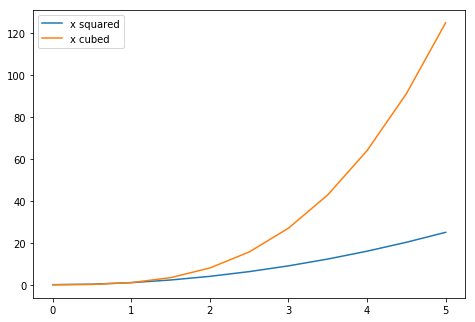

In [19]:
fig = plt.figure()

ax = fig.add_axes([0,0,1,1])

ax.plot(x, x**2, label="x squared")
ax.plot(x, x**3, label="x cubed")
ax.legend()

Notice how are legend overlaps some of the actual plot!

The **legend** function takes an optional keyword argument **loc** that can be used to specify where in the figure the legend is to be drawn. The allowed values of **loc** are numerical codes for the various places the legend can be drawn. See the [documentation page](http://matplotlib.org/users/legend_guide.html#legend-location) for details. Some of the most common **loc** values are:

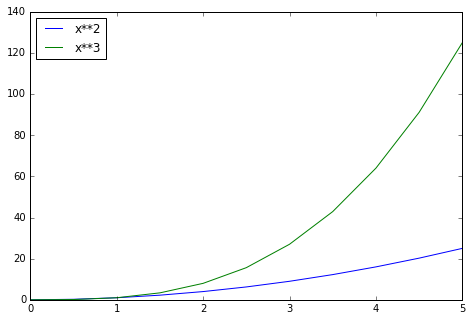

In [52]:
# Lots of options....

ax.legend(loc=1) # upper right corner
ax.legend(loc=2) # upper left corner
ax.legend(loc=3) # lower left corner
ax.legend(loc=4) # lower right corner

# .. many more options are available

# Most common to choose
ax.legend(loc=0) # let matplotlib decide the optimal location
fig

## Setting colors, linewidths, linetypes

Matplotlib gives you *a lot* of options for customizing colors, linewidths, and linetypes. 

There is the basic MATLAB like syntax (which I would suggest you avoid using for more clairty sake:

### Colors with MatLab like syntax

With matplotlib, we can define the colors of lines and other graphical elements in a number of ways. First of all, we can use the MATLAB-like syntax where `'b'` means blue, `'g'` means green, etc. The MATLAB API for selecting line styles are also supported: where, for example, 'b.-' means a blue line with dots:

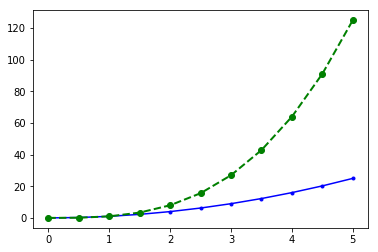

In [24]:
# MATLAB style data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAXoAAAD8CAYAAAB5Pm/hAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz%0AAAALEgAACxIB0t1+/AAAADl0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uIDIuMS4wLCBo%0AdHRwOi8vbWF0cGxvdGxpYi5vcmcvpW3flQAAIABJREFUeJzt3Xl8VNX9//HXJwkJEJCwhLAJcWEV%0AUSCoiODO4gaigorWBaFaW1GpItXaDau2/aJWW/0BblXWIlTcAIuAiIDsBQQBJez7TtiynN8fd5gk%0AbAmZTG5m8n4+HvOYuXfuzP2My5vDueeeY845REQkesX4XYCIiISXgl5EJMop6EVEopyCXkQkyino%0ARUSinIJeRCTKKehFRKKcgl5EJMop6EVEolyc3wUA1KhRw6WmpvpdhohIRJk/f/4O51xyQceViqBP%0ATU1l3rx5fpchIhJRzGxtYY5T142ISJRT0IuIRDkFvYhIlFPQi4hEOQW9iEiUU9CLiEQ5Bb2ISJRT%0A0IuI+GDqmqkcyjxUIudS0IuIlLD0Pel0Gd6Fxm80ZsSSEYR77W4FvYhICRvw3wEcyT7C+n3reXX2%0AqzgU9CIiUeObdd8wZtmY4ParnV8lxsIbxQp6EZESkuNyeGLSE8Htnhf05PKzLw/7eQsMejN7x8y2%0AmdnSPPv+amYrzOx/ZjbezJLyvDfQzFab2Q9m1ilchYuIRJoP//ch8zZ5EzgmxCbw8nUvl8h5C9Oi%0Afw/ofNy+L4HmzrkWwEpgIICZNQPuBC4IfOafZhZbbNWKiESojKMZDJwyMLjdv21/GiQ1KJFzFxj0%0AzrmvgV3H7ZvsnMsKbM4G6gVedwVGOeeOOOfWAKuBS4qxXhGRiDRu+Tg27d8EQK1KtXjmimdK7NzF%0A0Uf/IPBF4HVdYH2e9zYE9omIlGn3XnQvk++ZTPOazXnhmheonFC5xM4d0sIjZvYskAUML8Jn+wJ9%0AAerXrx9KGSIiEeH6865n4c8XYliJnrfILXozux+4Cejlckf7bwTOznNYvcC+Ezjnhjjn0pxzacnJ%0ABa6EJSISFeJi4oiNKdlLl0UKejPrDDwN3OKcO5jnrQnAnWaWYGbnAA2B70IvU0Qk8jjnSmyag9Mp%0AzPDKkcAsoLGZbTCz3sAbQGXgSzNbZGZvATjnlgFjgO+BicCjzrnssFUvIlKKjV42msZvNGbkkpFh%0An+bgdMzPkx+TlpbmtDi4iESTQ5mHaPKPJqzbuw6AVzu9Sr/L+hXrOcxsvnMuraDjdGesiEgYDJ41%0AOBjyyRWTuf/i+32rRUEvIlLMNu/fzIvfvBjc/uPVf6RK+Sq+1aOgFxEpZs999RwZmRkANK/ZnIda%0APeRrPQp6EZFitGDzAt5d9G5we3DHwcTFhHTLUsgU9CIixcQ5x5OTngzOL39To5u4/rzrfa5KQS8i%0AUmzGrxjP9LXTAe/GqL9d/zefK/Io6EVEisGRrCM89eVTwe1H2zxK4xqNfawol4JeRKQYLN22lF2H%0AvIl+q5avyvNXPu9zRbn8vUIgIhIlWtdpzapfreL3035Ps+RmVKtQze+SghT0IiLFpEbFGrxxwxt+%0Al3ECdd2IiEQ5Bb2ISBE551i1c5XfZRRIQS8iUkSfrfqMxm80ps+EPmw5sMXvck5JQS8iUgSZ2Zn0%0An9wfh2PYwmG8OOPFgj/kEwW9iEgR/HPuP1m5cyUAVRKq8FyH53yu6NQU9CIiZ2jXoV38YfofgtvP%0AdXiO5MTSuySqgl5E5Az9Ydof2H14NwDnVT2PX13yK58rOj0FvYjIGVixYwX/mPuP4PZfr/8rCXEJ%0APlZUMAW9iMgZ+PXkX5MdWAr7qtSr6Nakm88VFUxBLyJSSJN/nMxnqz4DwDBe6fQKZuZzVQVT0IuI%0AFEJWThZPTnoyuP3AxQ9wca2Lfayo8BT0IiKFsPPgTmpUrAFApfhKDLpmkM8VFZ4mNRMRKYSUSilM%0AvW8q41eMZ+fBndSuXNvvkgqtwKA3s3eAm4BtzrnmgX3VgNFAKpAO9HDO7Tavs+o14AbgIHC/c25B%0AeEoXESlZZkb3pt39LuOMFabr5j2g83H7ngGmOOcaAlMC2wBdgIaBR1/gzeIpU0REiqrAoHfOfQ3s%0AOm53V+D9wOv3gW559v/LeWYDSWYWOX+/ERE5zscrPuZo9lG/ywhJUS/GpjjnNgdebwFSAq/rAuvz%0AHLchsE9EJOJMXTOVbqO7ceGbF/Lpyk/9LqfIQh5145xzgDvTz5lZXzObZ2bztm/fHmoZIiLFKjsn%0AmycmPQHAyp0rGb1stM8VFV1Rg37rsS6ZwPO2wP6NwNl5jqsX2HcC59wQ51yacy4tObn0TgYkImXT%0Ae4veY/HWxQBUiKvAi9eW3mmIC1LUoJ8A3Bd4fR/wcZ79PzPPZcDePF08IiIRYf+R/Tz71bPB7afb%0APU29s+r5WFFoCjO8ciRwFVDDzDYAvwNeAsaYWW9gLdAjcPjneEMrV+MNr3wgDDWLiITVi9+8yNaM%0ArQDUrVyXpy5/yueKQlNg0Dvn7jrFW9ee5FgHPBpqUSIifknfk87gWYOD2y9e+yKJ8Yk+VhQ6TYEg%0AIpLHgP8O4Ej2EQDa1GlDrxa9fK4odAp6EZGAmetmMmbZmOD2K51eIcYiPyYj/xeIiBSDHJfD45Me%0AD273vKAn7eq387Gi4qOgFxHBm4b45kY3U7FcRRJiE3j5upf9LqnYaPZKEREgPjae5698nt4tezN7%0Aw2waJDXwu6Rioxa9iEgedc+qy23NbvO7jGKloBcRiXIKehEp0/4+5++s3LnS7zLCSkEvImXWxNUT%0A6TexHxf88wKemPgE2TnZfpcUFgp6ESmTtmds5/7/3A94I27W71tPbEysv0WFiYJeRMoc5xwPffJQ%0AcD6blMQU3rwxehfEU9CLSJkzZP4QJvwwIbj9Xrf3SE6M3unSFfQiUqas2LEiuKAIwGOXPEbn849f%0AFju6KOhFpMw4mn2UXuN6cSjrEAAXJF/AS9e95HNV4aegF5Ey4/mpz7Ng8wLAuxN2xG0jqFCugs9V%0AhZ+CXkTKhGnp0/jLzL8Et1++7mVapLTwsaKSo6AXkTJh+fblweGT1597PY9d+pjPFZUcBb2IlAmP%0AtHmEbx/8lrb12vJet/eiYp75wtLslSJSZrSp24aZD87EzPwupUSVnT/SRESgzIU8KOhFJEpl5WTR%0A74t+rN2z1u9SfKegF5Go9MLXL/D37/5Oi7daMHLJSL/L8ZWCXkSizrfrv+WPX/8RgH1H9pG+J93f%0AgnwWUtCb2RNmtszMlprZSDMrb2bnmNkcM1ttZqPNLL64ihURKci+I/u4Z9w95LgcADo06MDT7Z72%0AuSp/FTnozawu8BiQ5pxrDsQCdwIvA684584HdgO9i6NQEZHCeOyLx1izZw0AVRKq8MGtH0Tt9MOF%0AFWrXTRxQwczigIrAZuAaYGzg/feBbiGeQ0SkUEYvHc37i98Pbr9101vUr1Lfx4pKhyIHvXNuI/A3%0AYB1ewO8F5gN7nHNZgcM2AHVP9nkz62tm88xs3vbt24tahogIAOv2ruPhzx4Obt/b4l7ubH6njxWV%0AHqF03VQFugLnAHWARKDQc30654Y459Kcc2nJydE7D7SIhF92TjY/G/8z9hzeA0BqUipv3PCGz1WV%0AHqF03VwHrHHObXfOZQLjgHZAUqArB6AesDHEGkVETutv3/6N6WunAxBjMXx464eclXCWz1WVHqEE%0A/TrgMjOraN6tZtcC3wNTgdsDx9wHfBxaiSIip7dp/6bg62fbP0u7+u18rKb0CaWPfg7eRdcFwJLA%0Adw0BBgBPmtlqoDrwdjHUKSJySq91eY0Jd07gpkY38dsOv/W7nFLHnHN+10BaWpqbN2+e32WIiEQU%0AM5vvnEsr6DjdGSsiEuUU9CIScTbv30zfT/qy+9Buv0uJCAp6EYkoOS6H+z++n6ELhtLirRbMWDvD%0A75JKPQW9iESU1+e8zuQfJwOwcd9GMnMyfa6o9FPQi0jEWLJ1CQP+OyC4/evLf80151zjY0WRQUEv%0AIhHhcNZh7h53N0eyjwDQslZL/nT1n3yuKjIo6EUkIjzz32dYum0pAOXjyjO8+3AS4hJ8rioyKOhF%0ApNSbtHoSr815Lbg9uONgmiY39bGiyKKgF5FSbXvGdu7/+P7g9k2NbuLhtIdP/QE5gYJeREot5xx9%0APunDlgNbAEhJTOHtW97Gm15LCktBLyKl1qGsQ8ElAQHe7fouNRNr+lhRZIor+BAREX9ULFeRj+/8%0AmCHzh/DT7p/o0rCL3yVFJAW9iJRqZsbP037udxkRTV03IiJRTkEvIqXK9PTp9J/UnyNZR/wuJWoo%0A6EWk1Nh9aDf3jr+XwbMHc8mwS1i1c5XfJUUFBb2IlArOOR7+7GHW71sPeBOWJcYn+lxVdFDQi0ip%0A8MH/PmDMsjHB7aE3D6VO5To+VhQ9FPQi4rsfd/3ILz//ZXC7T6s+3Nr0Vh8rii4KehHx1baMbXQZ%0A3oX9R/cD0LBaQ17p9IrPVUUXBb2I+Gb/kf3cMPwGVu3yLrrGx8YzvPtw9c0XMwW9iPjiSNYRbh19%0AK/M3zwcgxmIYedtI2tRt43Nl0SekoDezJDMba2YrzGy5mbU1s2pm9qWZrQo8Vy2uYkUkevxh+h+Y%0AsmZKcPutG9+ie9PuPlYUvUJt0b8GTHTONQEuApYDzwBTnHMNgSmBbRGRfJ5u9zTt67cHYNDVg+jT%0Auo/PFUUvc84V7YNmVYBFwLkuz5eY2Q/AVc65zWZWG5jmnGt8uu9KS0tz8+bNK1IdIhK5DmUeYuTS%0AkTxw8QOaergIzGy+cy6toONCadGfA2wH3jWzhWY2zMwSgRTn3ObAMVuAlBDOISJRrEK5CjzY8kGF%0AfJiFEvRxQCvgTedcSyCD47ppAi39k/6Vwcz6mtk8M5u3ffv2EMoQkUgwbvk4/rX4X36XUSaFMk3x%0ABmCDc25OYHssXtBvNbPaebputp3sw865IcAQ8LpuQqhDREq5qWumctdHd3E0+yjbM7bT//L+fpdU%0AphS5Re+c2wKsN7Nj/e/XAt8DE4D7AvvuAz4OqUIRiWgLNy+k66iuHM0+CsCQBUM4cPSAz1WVLaEu%0APPIrYLiZxQM/AQ/g/eExxsx6A2uBHiGeQ0Qi1Opdq+k8vHPwrtc6lesw6Z5JVIqv5HNlZUtIQe+c%0AWwSc7IrvtaF8r4hEvi0HttDpw05sy/B6b5PKJzHpnkmkJqX6W1gZpDtjRaTY7T28l84fduan3T8B%0AUD6uPJ/c9QnNazb3ubKySUEvIsXqcNZhuo7qyuKtiwGItVjG3D6GK+pf4XNlZZeCXkSKTXZONnd/%0AdDfT104P7ht2yzBubnyzj1WJgl5Eis3sDbOZ8MOE4PbL173M/Rff719BAijoRaQYtavfjvE9x1M+%0Arjz92/bnqcuf8rskIfThlSIi+dzc+GYW/nwhjao30tQGpYRa9CISkhyXc8K+JjWaEGOKl9JC/yZE%0ApMi+/PFLLh12KZv3by74YPGNgl5EimTuxrncOvpW5m2aR7t32rF612q/S5JTUNCLyBn7YccP3DDi%0ABjIyMwDIzMkkITbB56rkVBT0InJGNu7bSKcPO7Hj4A4AqlWoxuR7JnN2lbN9rkxORUEvIoW2+9Bu%0AOg/vzNq9awGoWK4in939GU2Tm/pcmZyOgl5ECuVg5kFuHnkzS7ctBSAuJo6xd4zlsnqX+VyZFERB%0ALyIFysrJoufYnsxcPzO4772u79GlYRcfq5LCUtCLyGk55+jzSR8+XflpcN/gjoPp1aKXj1XJmVDQ%0Ai8hpHco6xNo9a4Pbz7R7hifaPuFjRXKmNAWCiJxWxXIV+bzX59w7/l7Oij+LP1/7Z79LkjOkoBeR%0AApWPK8+o20bhcJq/JgKp60ZETrBx38YT9sXGxBIXo7ZhJFLQi0g+s9bPotEbjfjzjD/jnPO7HCkG%0ACnoRCfp++/fcOOJGDmYe5NmvnuXPM9QfHw0U9CICwMx1M7n6/avZfXg3AMkVk+lxQQ+fq5LioKAX%0AEd5Z+A5Xv3812zK2AVApvhKf9/qchtUb+lyZFIeQg97MYs1soZl9Gtg+x8zmmNlqMxttZvGhlyki%0A4ZCVk8WTk56k94TeZOZkAl5LfmKviaTVSfO5OikuxdGi7wcsz7P9MvCKc+58YDfQuxjOISLFbM/h%0APdw04iZemf1KcF+LlBbM7TOXdvXb+ViZFLeQgt7M6gE3AsMC2wZcA4wNHPI+0C2Uc4hI8Vu1cxWX%0ADruUST9OCu7r1qQbMx+cSYOkBj5WJuEQaov+VeBp4NiikdWBPc65rMD2BqBuiOcQkWIWFxPHzoM7%0Ag9vPtX+Oj3p8RKX4Sj5WJeFS5KA3s5uAbc65+UX8fF8zm2dm87Zv317UMkSkCM6peg4f9fiIsxLO%0AYtRto/jTNX/SYt5RLJTb3NoBt5jZDUB54CzgNSDJzOICrfp6wIm32AHOuSHAEIC0tDTdlSESRs6d%0AOHXBlalXkt4vnaoVqvpUlZSUIv8R7pwb6Jyr55xLBe4EvnLO9QKmArcHDrsP+DjkKkWkyLZlbOP6%0AD65n5rqZJ7ynkC8bwvF3tQHAk2a2Gq/P/u0wnENECmHxlsW0GdqGKWum0H1M93zTDUvZUSxB75yb%0A5py7KfD6J+fcJc65851zdzjnjhTHOUTkzIxfPp5277Rj3d51AGzP2M609Gn+FiW+0NUXkSjjnGPQ%0A14PoPqY7GZkZAFSOr8wnd33CfRff53N14gfNOSoSRQ5mHuTBjx9k9LLRwX3nVT2PCXdNoFlyMx8r%0AEz8p6EWixIZ9G+g2qhvzN+eOeL469Wr+fce/qV6xuo+Vid/UdSMSBWZvmE2boW3yhfwv0n7BpHsm%0AKeRFLXqRaLBw80K2HNgCQKzF8nqX13mkzSM+VyWlhYJeJAo80uYR/rf1f4z5fgxj7xjL1edc7XdJ%0AUopYaVgqLC0tzc2bN8/vMkQiWmZ2Jpv2b9KkZGWImc13zhU4n7T66EUizI+7fqTXuF5kHM3It79c%0AbDmFvJyUum5EIsjUNVO5/d+3s+vQLjKzMxl9++gT5rAROZ5a9CIR4s25b9Lxw47sOrQLgAk/TGDJ%0AtiU+VyWRQC16kVIuMzuTfhP78ea8N4P7alWqxX96/ocWKS18rEwihYJepBTbeXAnd/z7DqamTw3u%0Aa127Nf+58z/UO6uej5VJJFHQi5RSy7Yt45ZRt/DT7p+C++5sfifv3PIOFcpV8LEyiTTqoxcphT5d%0A+Slt326bL+QHXT2IEd1HKOTljKlFL1IKfb7qc/Yf3Q9AYrlEPuz+Id2adPO5KolUatGLlEKDrhlE%0A9QrVaVClAd/2/lYhLyFRi17EZ1+t+YrmNZtTM7FmcF+1CtUYcdsIWtZqSXJiso/VSTjNmgXTpsFV%0AV0HbtuE7j4JexCfr9q6j/+T+jP1+LA9e/CBvd82/6mbH8zr6VJmUhM8/h1tvhawsSEiAKVPCF/bq%0AuhEpYYezDjPo60E0eaMJY78fC8A7i97hu43f+VyZhNOWLTB6NPziF3DBBXDjjXD0KOTkeM/TpoXv%0A3GrRi5QQ5xyfrvyUxyc9nm80DcDdF96tcfFRZuNGmD499/HDD97+SpXgiiugQwd4912vRR8f73Xf%0AhIuCXqQErNq5in4T+/HF6i/y7b8o5SJe7/I67Ru096kyKS7r1uUP9tWrvf1nnQXt20Pv3nDlldCq%0AFcQFkvdnP1MfvUjEO3D0AC98/QKDZw/maPbR4P6q5asy6JpB9G3dl7gY/W8YaZyD9PTcUJ82zdsG%0AqFrVC/ZHHvGC/eKLITb25N/Ttm14A/4Y/RcmEkb//em/vDTzpeC2YfRt3ZdB1wyiRsUaPlYmZ8I5%0A+PHH3FCfPh3Wr/feq17d64Z54gkv2C+8EGJK2dXPIge9mZ0N/AtIARwwxDn3mplVA0YDqUA60MM5%0Atzv0UkUiT9fGXbn2nGuZsmYKbeu15fUur9O6Tmu/y5ICOAcrV+aG+vTpsGmT915ystfVMmCAF+zN%0AmpW+YD9eKC36LKC/c26BmVUG5pvZl8D9wBTn3Etm9gzwDDAg9FJFSrfdh3azYd8GLky5MLjPzHi9%0Ay+vM3TSXe1rcQ4yV8kQog2bNgqlToUED2Ls3N9i3bvXer13bC/RjjyZNINKWAChy0DvnNgObA6/3%0Am9lyoC7QFbgqcNj7wDQU9BLFclwO7yx8h4FTBlK1fFWWPLKEhLiE4PtNk5vSNLmpjxXK8TIyYO5c%0Ab7jjkCHeEMdj6tWD667LDfaGDSMv2I9XLH30ZpYKtATmACmBPwQAtuB17ZzsM32BvgD169cvjjJE%0AStycDXP45Re/ZN4mb83jHQd38OrsVxlwhdo2pYVz3giYWbNg9mzveckSyM7Of1xMDDz5JPzlL5Ef%0A7McLOejNrBLwEfC4c25f3mXNnHPOzE66+rhzbggwBLzFwUOtQ6QkbT2wlYFTBvLuonfz7a9fpT5N%0AajTxqSoB2L8fvvsuN9hnz4adO733KleGSy+FgQO90S4xMdC9u3fDUny89zraQh5CDHozK4cX8sOd%0Ac+MCu7eaWW3n3GYzqw1sC7VIkdIiMzuTf8z9B7+b9jv2HdkX3J8Qm8DT7Z7mmSueoWK5ij5WWLbk%0A5HgXTfO21pcu9VrxAE2bQteucNllXrA3bXriUMcpU0pmLLufQhl1Y8DbwHLn3OA8b00A7gNeCjx/%0AHFKFIqXEV2u+4rEvHmPZ9mX59ndt3JXBnQZzbtVzfaqs7Niz58TW+p493ntJSV5r/bbbvGC/9FJv%0AX0FKaiy7n0Jp0bcD7gWWmNmiwL7f4AX8GDPrDawFeoRWooj/dh3axS0jbyEjMyO4r1H1RrzW+TU6%0An9/Zx8qiV04OfP99bkt99mxvG7zulebN4Y47vJC+7DJo3Lj0D3P0Syijbr4BTtWbdW1Rv1ekNKpW%0AoRq/af8bnv3qWSrFV+L5Ds/T77J+xMfG+11a1Jg4EUaN8sJ6/Xqv5b4v0DtWvboX5nfd5QV7mzbe%0A1AJSOLozVuQ4i7cs5vNVnzOw/cB8+/u37c+Ogzv49eW/pk7lOj5VFx02b4YFC3Ifs2bljlsHb0hj%0Ar165fevnnx+dF0lLioJeBG9OmlFLRzF0wdDgdMEdz+uY7y7WhLgEBncafKqvkJNwDtauzR/qCxbk%0AhroZNGoEKSmwbZt3fGwsPPCANzJGioeCXsq0+ZvmM2T+EEYsHcGBowfyvTd0wVBNV3AGcnJg1Sov%0AyBcuzA313YEJUGJjvekCOnf2ZnBs1Qouusgb8jhrFlx7be4wx3BO2VsWKeilzNl7eC8jloxg6IKh%0ALNyy8IT342Pj6d60O70u7OVDdZEhKwuWL8/fSl+0CA4E/qyMj4cWLbyLpcdCvXlzqFDh5N/Xtm3Z%0AGOboFwW9lCmjlo6i94TeHMw8eMJ7TWo0oU+rPvzsop9pZsk8Dh/2xqbnDfUlS7z9AImJ3lS8DzwA%0ALVt6od6sGZQrd2bnKQvDHP2ioJcypUVKi3whXz6uPHc0u4O+rfvS7ux2WBm/4vfll/DRR154797t%0AhfqyZV4LHqBKFS/IH300t6XesOGp51uX0kFBL1HHOcc3675h6IKhvHzdy9SuXDv4XrPkZrQ7ux37%0AjuyjT6s+3NPiHqpWqOpjtf7Yv98bk75sWe5j/nzYsSP3mKQkb9TLjTfmhnpqqka/RCIFvUSNHQd3%0A8P6i9xm2cBgrdqwAoGmNpicMk/zkrk9IKp9UJlrvBw96fenLlnndL8dCfe3a3GPKl/emBqhXz5sT%0A5tjIl6eegt/8xr/apfgo6CWi5bgcpqVPY8j8IYxfMT7fcn0AwxYOY8AVA/LNAx+NLfjDh2HFivwt%0A9KVLYc2a3Hlf4uO9u0cvvxz69IELLvAe557rBfvxI1+uvtrf3yTFR0EvEWnrga28t+g9hi4Yyo+7%0Afzzh/crxlbn7wrvp06pPVC32cfSoN4lX3tb5smXeNLzH5lSPi/PGprdu7S0+3by5F+jnn5+7KPXJ%0AaORL9FLQS8RZuHkhlwy7hKycrBPeu7TupfRt3ZceF/SgUnwlH6orHjNmwLhxUKOGdyH0WLCvWpV7%0AYTQmxgvv5s2hZ8/cFnqjRl6LvCg08iU6Keil1MvKySIuJvc/1RYpLahTuQ7r9q4DoEpCFe5tcS99%0AWvehRUoLv8o8Y5mZkJ7utcZXrfIeq1d7Qxc3bsx/7HnneSHerVtuC71xY69/XaQgCnopVZxzrNix%0AghnrZvD12q+ZsW4GvVv25vkrnw8eExsTy0MtH2LyT5Pp06oPtze7vdTOAX+qMF+1ytufd5WjSpW8%0AoYrVqnkLUR+7KPrb38LvfufXL5BooKAXX2XlZLF4y+JgsH+z7hu2H9ye75gZ62ac8LlnOzzLb6/8%0AbUmVeVrHh3neUD9VmLdu7XW3NGzodb80bAg1a3pDF4+/KNqxo1+/TKKFgl58MWfDHH437Xd8u/5b%0A9h/df9pjl2xdQo7LyXdRtaQusM6a5V2cvOIKqFXrxDBfvdob2XKmYX46uigqxU1BL2G1/8h+5m+e%0Az1WpV+XbH2MxTPpx0kk/U61CNdrXb0/7+u3p0KADF9e6OOzBfvSo1y++bl3uY+5c+OST3NEseR0L%0A81atoEePMw/zguiiqBQnBb0Uq+0Z2/lm3TfBrpiFWxaS43LY+OTGfHO4t6zdksRyiWRkZlC3cl06%0ANOgQDPamyU2LNdid824EOhbg69fnD/R167z50d1xS9QnJuaGvJm3cPTjjxdfmIuUFAW9hGT93vXB%0Ai6Zfr/2a5TuWn/S4GWtn0LN5z+B2XEwcH/X4iEbVG5GalBrSXaqHD8OGDSeGd97HoUP5P1O+PJx9%0ANtSvD506ec95H/XqweLF+fvK+/dXK1sik4JeiqzjBx358qcvT3uMYbRIaXHSIO90fqcCz5GZCV98%0AAZMmQd263jS3eQN8/fr8KxMdU6uWF9gXXujN1XJ8kNeoob5yKTsU9JJPxtEM1u5dS/qedNbu8Z7T%0A96ZzUcpF/KZ9/olPzkk654TPx8XE0aZOm2A3TLv67Ugqn5TvmMxMbzWhrVthyxbv+fjXx7Z37Tqx%0AxooVoUEDL7BbtswN72Mt9Hr1ICGheP55qK9cooGCvgxbuHkhw5cM98J8Tzpr965lx8EdJz1258Gd%0AXB33m3yt2w4NOvDhkg9pW6/y6QyYAAAHPUlEQVQtl9drT/PKHajrLmXvjops3QBL5sOXhQxv8C5w%0ApqR4rfEmTeDKK73b/b/6KndM+cCB8Mc/qn9c5Ewo6KOIc47dh3fntsQD4Z2+J50Yi2Fcz3H5jv9p%0A90/836z/K9R3L1yTzpUPebffx8Z6YZ+ZczsNtvZg4eZyTDmD8K5Vy9t37HFsu+JJ7nmaNQu+/Ta3%0An/yGGxTyImcqbEFvZp2B14BYYJhz7qVwnSvaOec4lHWI8nHlmTM7JtiqTm2+mT/P+DPpe9ODXS2n%0AGpOeEFOBkSMde/cau3d7i0qsymgANY87MLsc7K0Pe1JhT4PAcyq7dp8Lmd4hWVneghRNmybQtDFc%0A1SF/YBcU3mdC/eQioTN3/Jiy4vhSs1hgJXA9sAGYC9zlnPv+ZMenpaW5efPmFXsdJc05x8HMg2Rk%0AZnDg6IHgI+Oot92ufjtqJuZP1scnPs6uQ7vIOJrBvsMH2Hf4AAcCx2dkHuBgVgaHszNwOH7FSt56%0AoWGwVd2lxyY+aVS38AX+dStkeOdPSIAqKXvJSfsHSaSSHJdKSvkG1Klcm2pVY0hKgqpVCT6vWwcP%0AP+z1r8fHe+Gr0BXxl5nNd86lFXRcuFr0lwCrnXM/BYoZBXQFThr0RTVrFrw2ZSRHak+nZk1Hjssh%0Ax+XgOPnrW5vcSo8LepCT493JmJUFL818gTmbZpOTc+w4R3ZODtk5ObjA62P77z7nCTrU7EZ2trcQ%0A8ty5MCO1M9tYzOGcAxxxXiCfSqtlk6iwqSMHDxJ8bLj7Q1yFnYX6va+/dSBfq3ri2FowIB5ic+dg%0Aj8tJ5CzXgOqxqdRKSKVOYgNSk1I5t3oDLpmdREp1L7y9RZqrAIVfWaJRI7WsRSJRuIK+LrA+z/YG%0A4NLiPMGsWd7CCEeumwFt/p93hgKMfus8ev63R/6dd86FJp8W6pzz3+/p/d0krz47oe6WQn3+wNED%0AJCV4LeSKFb3H2PhEDlBw0CfEVGDgC4d56dG8reoYliX8g6rlq5KalEqDpAZUr1A9bCsnaQSKSGTy%0A7WKsmfUF+gLUr1//jD8/bZoXeLjC30HZtq3j2rZet0dcnPc8PCuGpdkFfxagT1/Hzb/1Fk/+4IPA%0AXZOZ+ec8Lx9bnkoJlagUX4nEcolUig+8jk/k1/cn075B/u+8fsmLZGZnkhif59jjPpdYLpHYGG/1%0A5Y5N87eq2/JQoX+/iJRN4eqjbwv83jnXKbA9EMA59+LJji9KH/2xGf6OpMwgtvZSnng8hvPPi8HM%0AiLEYYiwGI/d1jMXQLLkZF9W6KN/3fLfxO7Yc2HLC8Sf7nvOrnU/ds+rmm12wXLVNjB4NV11eKV8g%0Ai4iEW2H76MMV9HF4F2OvBTbidXjc7ZxbdrLji3ox9tjMgn70Gft5bhER8PlirHMuy8x+CUzCG175%0AzqlCPhR+9hmrv1pEIkXY+uidc58Dn4fr+0VEpHBKZvUGERHxjYJeRCTKKehFRKKcgl5EJMop6EVE%0AolxYxtGfcRFm24G1Rfx4DeDkk6hHL/3mskG/uWwI5Tc3cM4lF3RQqQj6UJjZvMLcMBBN9JvLBv3m%0AsqEkfrO6bkREopyCXkQkykVD0A/xuwAf6DeXDfrNZUPYf3PE99GLiMjpRUOLXkRETiOig97MOpvZ%0AD2a22sye8buecDOzd8xsm5kt9buWkmJmZ5vZVDP73syWmVk/v2sKNzMrb2bfmdniwG/+g981lQQz%0AizWzhWZWuCXfIpyZpZvZEjNbZGZhXTQ7YrtuznQB8mhgZh2AA8C/nHPN/a6nJJhZbaC2c26BmVUG%0A5gPdovzfswGJzrkDZlYO+Abo55yb7XNpYWVmTwJpwFnOuZv8rifczCwdSHPOhf2+gUhu0QcXIHfO%0AHQWOLUAetZxzXwO7/K6jJDnnNjvnFgRe7weW461JHLWc50Bgs1zgEZktskIys3rAjcAwv2uJRpEc%0A9CdbgDyqA6CsM7NUoCUwx99Kwi/QjbEI2AZ86ZyL9t/8KvA0kON3ISXIAZPNbH5gDe2wieSglzLE%0AzCoBHwGPO+f2+V1PuDnnsp1zFwP1gEvMLGq76szsJmCbc26+37WUsCucc62ALsCjga7ZsIjkoN8I%0AnJ1nu15gn0SZQD/1R8Bw59w4v+spSc65PcBUoLPftYRRO+CWQJ/1KOAaM/vQ35LCzzm3MfC8DRiP%0A1x0dFpEc9HOBhmZ2jpnFA3cCE3yuSYpZ4MLk28By59xgv+spCWaWbGZJgdcV8AYcrPC3qvBxzg10%0AztVzzqXi/X/8lXPuHp/LCiszSwwMLsDMEoGOQNhG00Vs0DvnsoBjC5AvB8aEYwHy0sTMRgKzgMZm%0AtsHMevtdUwloB9yL18pbFHjc4HdRYVYbmGpm/8Nr0HzpnCsTQw7LkBTgGzNbDHwHfOacmxiuk0Xs%0A8EoRESmciG3Ri4hI4SjoRUSinIJeRCTKKehFRKKcgl5EJMop6EVEopyCXkQkyinoRUSi3P8H/eA6%0ApgDiDZgAAAAASUVORK5CYII=line color and style 
fig, ax = plt.subplots()
ax.plot(x, x**2, 'b.-') # blue line with dots
ax.plot(x, x**3, 'g--',lw=2,marker='o') # green dashed line

### Colors with the color= parameter

We can also define colors by their names or RGB hex codes and optionally provide an alpha value using the `color` and `alpha` keyword arguments. Alpha indicates opacity.

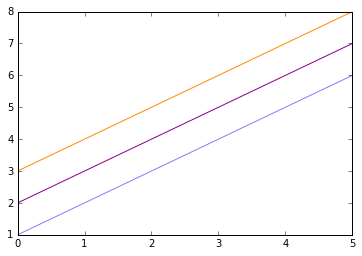

In [56]:
fig, ax = plt.subplots()

ax.plot(x, x+1, color="blue", alpha=0.5) # half-transparant
ax.plot(x, x+2, color="#8B008B")        # RGB hex code
ax.plot(x, x+3, color="#FF8C00")        # RGB hex code 

### Line and marker styles

To change the line width, we can use the `linewidth` or `lw` keyword argument. The line style can be selected using the `linestyle` or `ls` keyword arguments:

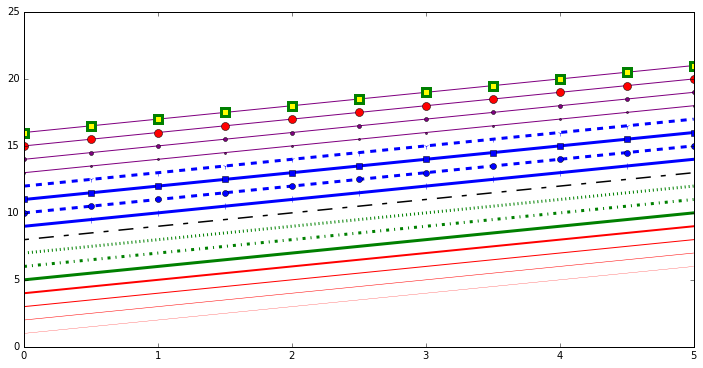

In [57]:
fig, ax = plt.subplots(figsize=(12,6))

ax.plot(x, x+1, color="red", linewidth=0.25)
ax.plot(x, x+2, color="red", linewidth=0.50)
ax.plot(x, x+3, color="red", linewidth=1.00)
ax.plot(x, x+4, color="red", linewidth=2.00)

# possible linestype options ‘-‘, ‘–’, ‘-.’, ‘:’, ‘steps’
ax.plot(x, x+5, color="green", lw=3, linestyle='-')
ax.plot(x, x+6, color="green", lw=3, ls='-.')
ax.plot(x, x+7, color="green", lw=3, ls=':')

# custom dash
line, = ax.plot(x, x+8, color="black", lw=1.50)
line.set_dashes([5, 10, 15, 10]) # format: line length, space length, ...

# possible marker symbols: marker = '+', 'o', '*', 's', ',', '.', '1', '2', '3', '4', ...
ax.plot(x, x+ 9, color="blue", lw=3, ls='-', marker='+')
ax.plot(x, x+10, color="blue", lw=3, ls='--', marker='o')
ax.plot(x, x+11, color="blue", lw=3, ls='-', marker='s')
ax.plot(x, x+12, color="blue", lw=3, ls='--', marker='1')

# marker size and color
ax.plot(x, x+13, color="purple", lw=1, ls='-', marker='o', markersize=2)
ax.plot(x, x+14, color="purple", lw=1, ls='-', marker='o', markersize=4)
ax.plot(x, x+15, color="purple", lw=1, ls='-', marker='o', markersize=8, markerfacecolor="red")
ax.plot(x, x+16, color="purple", lw=1, ls='-', marker='s', markersize=8, 
        markerfacecolor="yellow", markeredgewidth=3, markeredgecolor="green");

### Control over axis appearance

In this section we will look at controlling axis sizing properties in a matplotlib figure.

## Plot range

We can configure the ranges of the axes using the `set_ylim` and `set_xlim` methods in the axis object, or `axis('tight')` for automatically getting "tightly fitted" axes ranges:

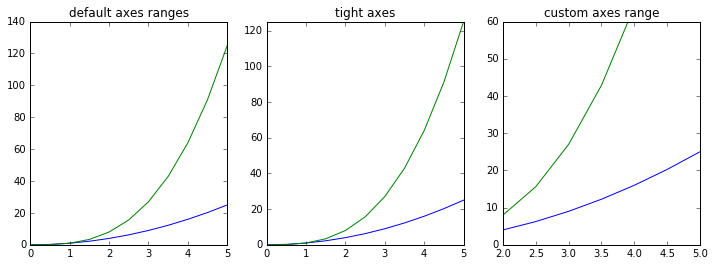

In [58]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

axes[0].plot(x, x**2, x, x**3)
axes[0].set_title("default axes ranges")

axes[1].plot(x, x**2, x, x**3)
axes[1].axis('tight')
axes[1].set_title("tight axes")

axes[2].plot(x, x**2, x, x**3)
axes[2].set_ylim([0, 60])
axes[2].set_xlim([2, 5])
axes[2].set_title("custom axes range");

# Special Plot Types

There are many specialized plots we can create, such as barplots, histograms, scatter plots, and much more. Most of these type of plots we will actually create using seaborn, a statistical plotting library for Python. But here are a few examples of these type of plots:

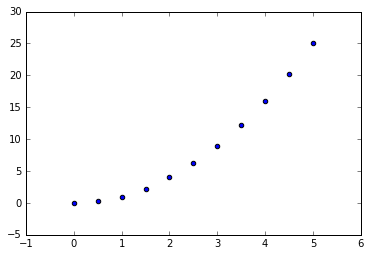

In [60]:
plt.scatter(x,y)

(array([ 14.,  11.,   9.,  12.,   6.,   7.,  13.,  13.,   6.,   9.]),
 array([  28. ,  123.5,  219. ,  314.5,  410. ,  505.5,  601. ,  696.5,
         792. ,  887.5,  983. ]),
 <a list of 10 Patch objects>)

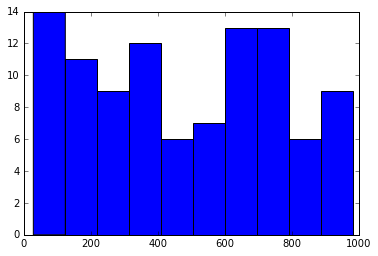

In [65]:
from random import sample
data = sample(range(1, 1000), 100)
plt.hist(data)

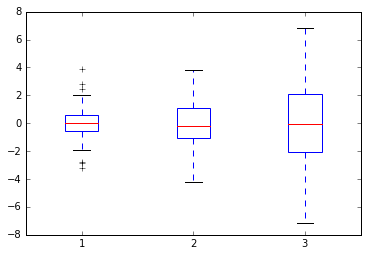

In [69]:
data = [np.random.normal(0, std, 100) for std in range(1, 4)]

# rectangular box plot
plt.boxplot(data,vert=True,patch_artist=True);   

## Further reading

* http://www.matplotlib.org - The project web page for matplotlib.
* https://github.com/matplotlib/matplotlib - The source code for matplotlib.
* http://matplotlib.org/gallery.html - A large gallery showcaseing various types of plots matplotlib can create. Highly recommended! 
* http://www.loria.fr/~rougier/teaching/matplotlib - A good matplotlib tutorial.
* http://scipy-lectures.github.io/matplotlib/matplotlib.html - Another good matplotlib reference.
